In [ ]:
pip install GEOparse

     |████████████████████████████████| 278 kB 15.4 MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29063 sha256=5b8e284b1c5e011c25ca5d7af73c6b2443e164459b1a0665509d60b5d8f16a82
  Stored in directory: /root/.cache/pip/wheels/4d/15/e8/fbf3b47444215d9728c20d7b35436b50086aa67c2ad6dcedad
Successfully built GEOparse


In [ ]:
# os
import os

# GEOparse
import GEOparse

# NumPy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
gse = GEOparse.get_GEO(geo="GSE26299", destdir="./")

04-Jan-2022 17:45:07 DEBUG utils - Directory ./ already exists. Skipping.
04-Jan-2022 17:45:07 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE26nnn/GSE26299/soft/GSE26299_family.soft.gz to ./GSE26299_family.soft.gz
100%|██████████| 46.5M/46.5M [00:00<00:00, 110MB/s]
04-Jan-2022 17:45:07 DEBUG downloader - Size validation passed
04-Jan-2022 17:45:07 DEBUG downloader - Moving /tmp/tmpp505t301 to /content/GSE26299_family.soft.gz
04-Jan-2022 17:45:07 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE26nnn/GSE26299/soft/GSE26299_family.soft.gz
04-Jan-2022 17:45:07 INFO GEOparse - Parsing ./GSE26299_family.soft.gz: 
04-Jan-2022 17:45:07 DEBUG GEOparse - DATABASE: GeoMiame
04-Jan-2022 17:45:07 DEBUG GEOparse - SERIES: GSE26299
04-Jan-2022 17:45:07 DEBUG GEOparse - PLATFORM: GPL1261
/usr/local/lib/python3.7/dist-packages/GEOparse/GEOparse.py:113: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=F

In [ ]:
# Defining Data Set, Labels, and Genes Metadata
df = pd.DataFrame({gsm_name: gsm.table.iloc[:,1] for gsm_name, gsm in gse.gsms.items()})
le = LabelEncoder()
labels = le.fit_transform([gsm.metadata["title"][0].split(" rep")[0] for gsm_name, gsm in gse.gsms.items()])
le2 = LabelEncoder()
types = le2.fit_transform([gsm.metadata["title"][0].split("(")[1][:-1] for gsm_name, gsm in gse.gsms.items()])
genes_metadata = list(gse.gpls.items())[0][1].table
df = df[genes_metadata["Gene Symbol"].isna() == False]
genes_metadata = genes_metadata[genes_metadata["Gene Symbol"].isna() == False]
df.index = genes_metadata["Gene Symbol"]
all_labels = [gsm.metadata["title"][0].split("rep")[0] + gsm.metadata["title"][0].split(" (")[1][:-1] for gsm_name, gsm in gse.gsms.items()]
le3 = LabelEncoder()
all_labels_encoded = le3.fit_transform(all_labels)

In [ ]:
print("Shape of data:\t " + str(df.shape))
print("Shape of labels: " + str(labels.shape))
print("(Classes encodings, Class name, Number of examples in class): ")
temp_list = list(set(labels))
print([(i, le.inverse_transform(temp_list)[i], np.sum(labels==temp_list[i])) for i in range(len(temp_list))])
print("(Classes type encodings, Class type, Number of examples in class): ")
temp_list = list(set(types))
print([(i, le2.inverse_transform(temp_list)[i], np.sum(types==temp_list[i])) for i in range(len(temp_list))])

Shape of data:	 (39666, 108)
Shape of labels: (108,)
(Classes encodings, Class name, Number of examples in class): 
[(0, 'D2-Gpnmb+ control', 20), (1, 'Moderate', 17), (2, 'No or early 1', 20), (3, 'No or early 2', 21), (4, 'Preglaucoma control', 10), (5, 'Severe', 20)]
(Classes type encodings, Class type, Number of examples in class): 
[(0, 'OHN', 60), (1, 'retina', 48)]


In [ ]:
# Source for skewness: https://www.statisticshowto.com/skewness/
def skewness(arr, examples_in_rows=True):
  if examples_in_rows:
    ans = 3 * (arr.mean(axis=0) - arr.median(axis=0)) / arr.std(axis=0)
  else:
    ans = 3 * (arr.mean(axis=1) - arr.median(axis=1)) / arr.std(axis=1)
  return ans

In [ ]:
temp_df = df
temp_df.index = genes_metadata.index
df_skewness = skewness(temp_df, False)
threshold = 2
skewed_genes = df_skewness[(df_skewness <= -threshold) | (df_skewness >= threshold)]
print(str(len(genes_metadata["Gene Symbol"][skewed_genes.index].unique())) + " skewed genes found")

112 skewed genes found


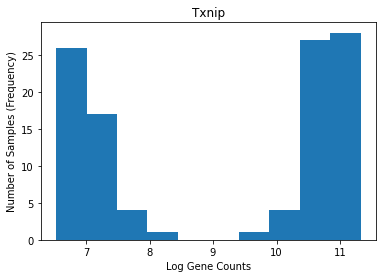

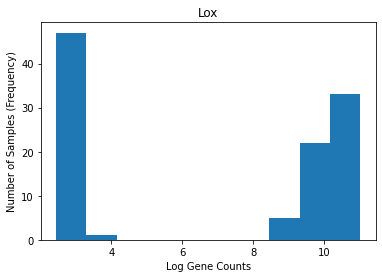

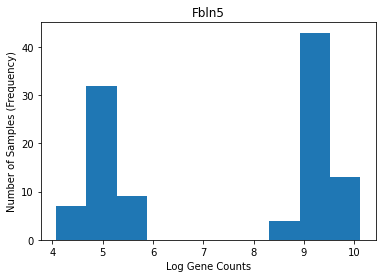

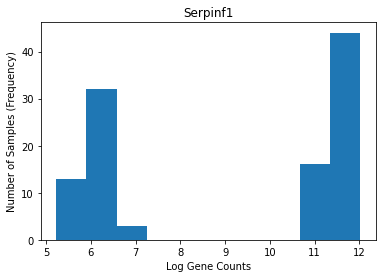

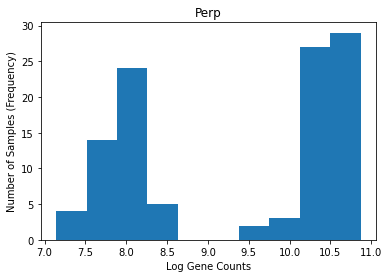

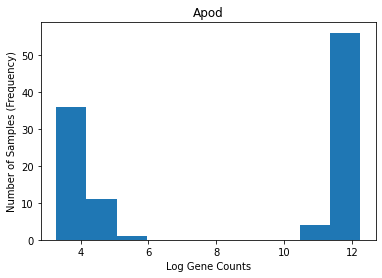

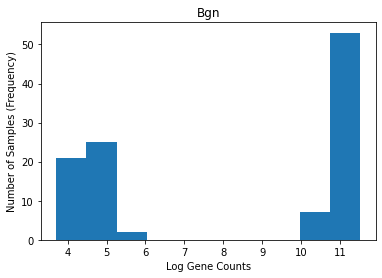

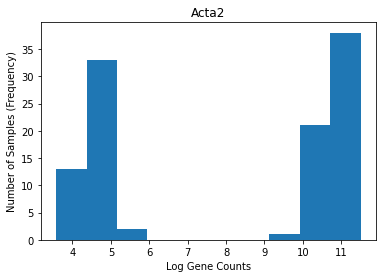

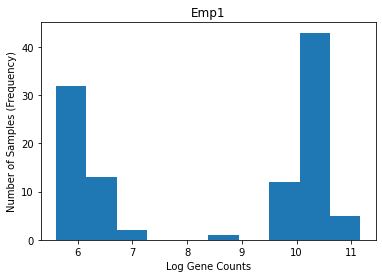

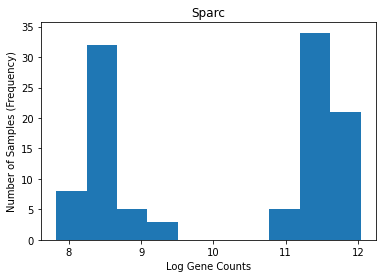

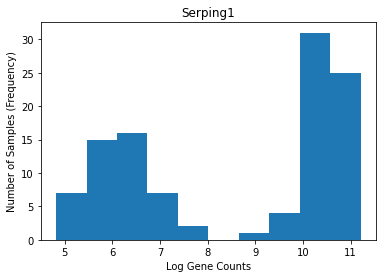

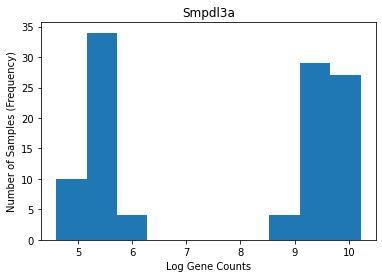

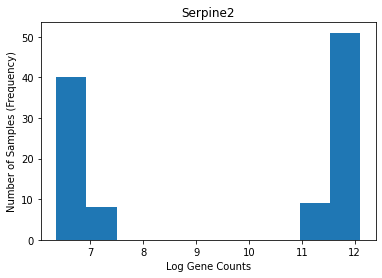

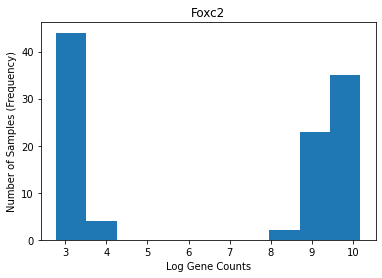

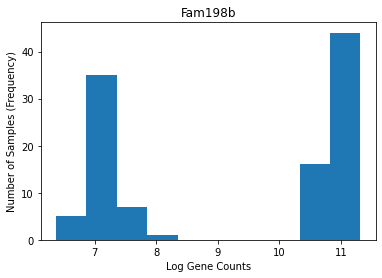

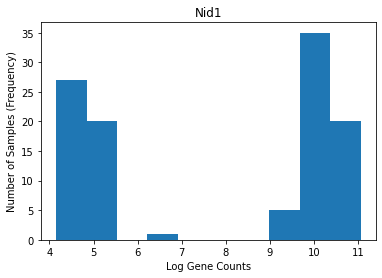

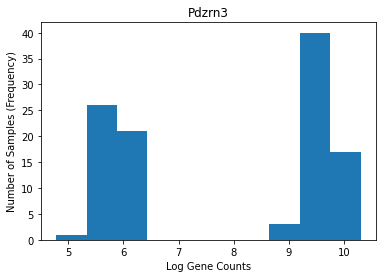

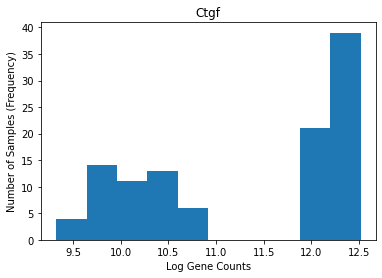

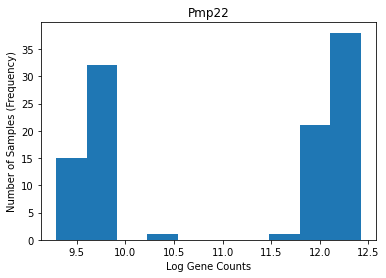

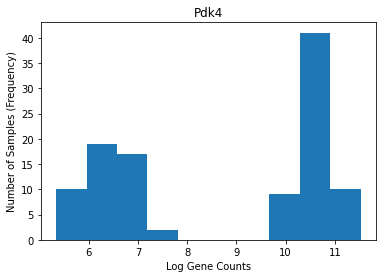

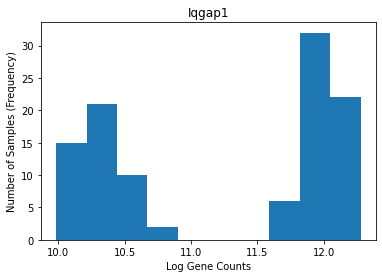

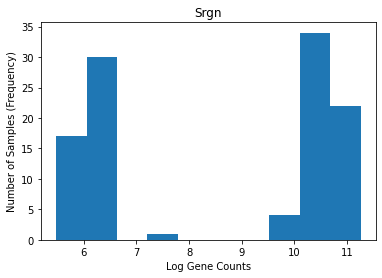

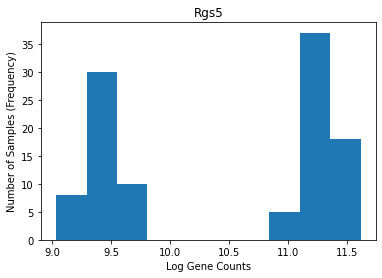

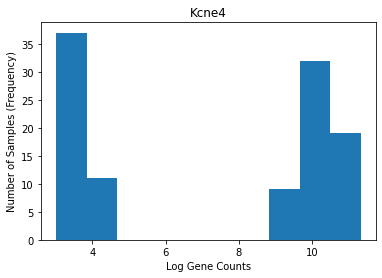

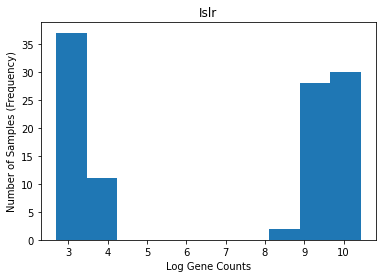

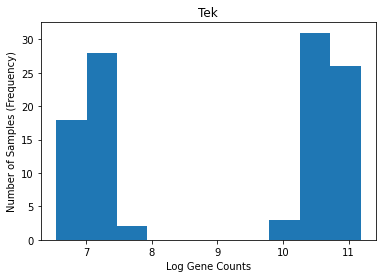

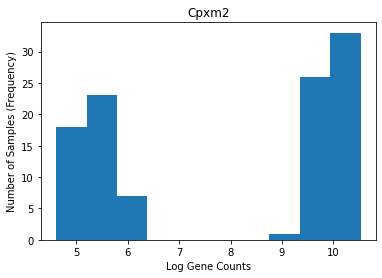

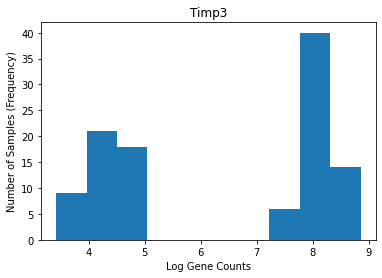

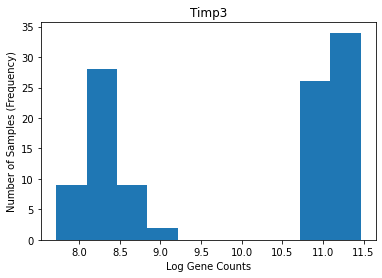

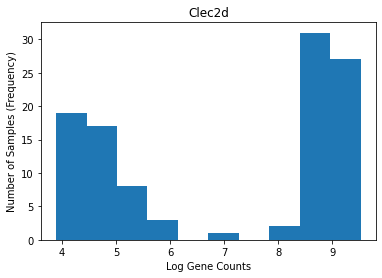

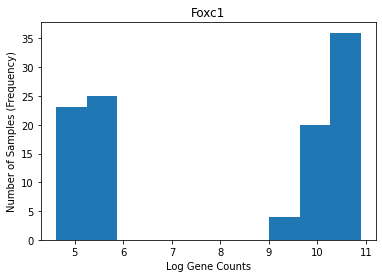

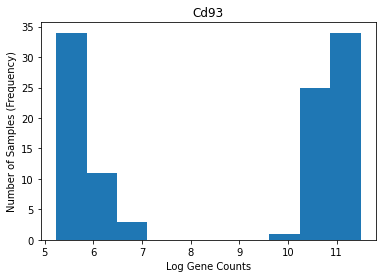

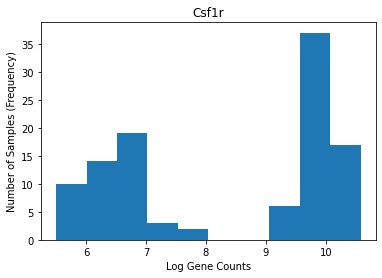

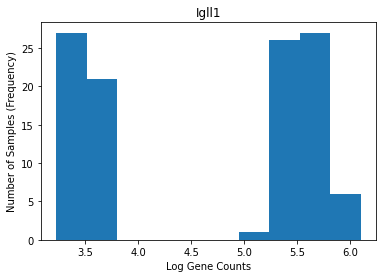

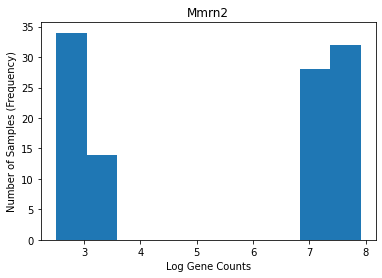

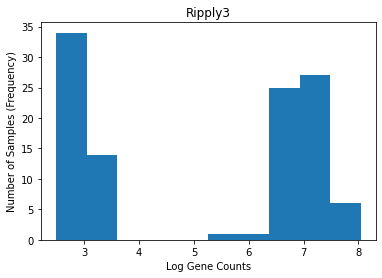

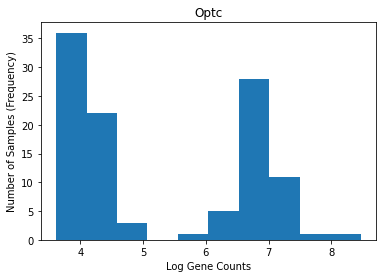

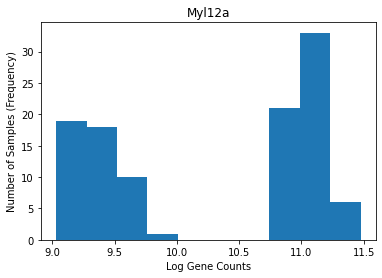

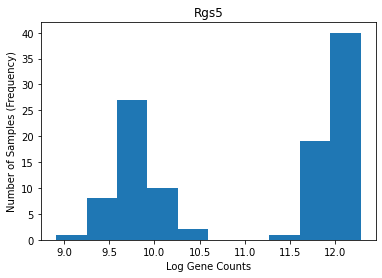

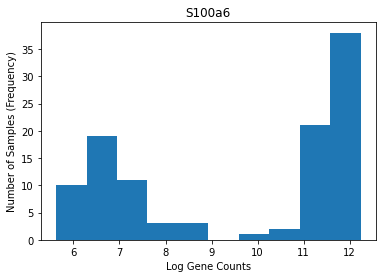

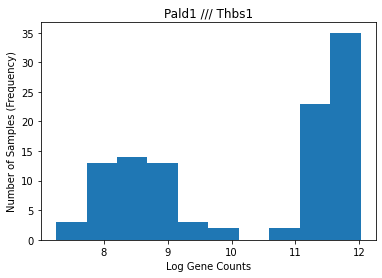

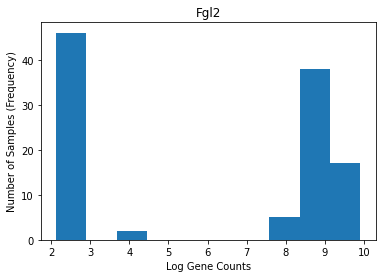

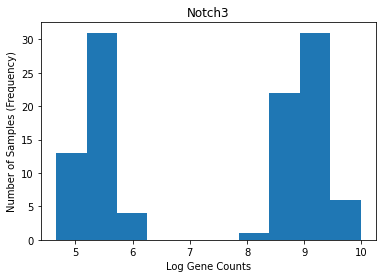

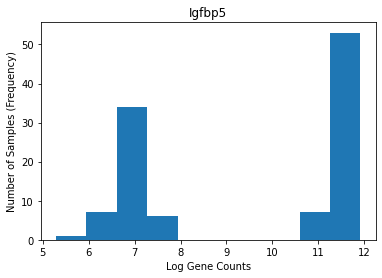

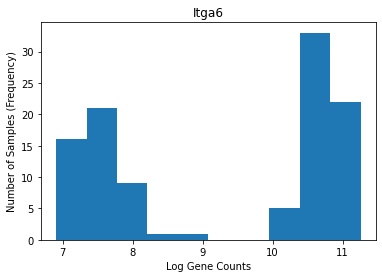

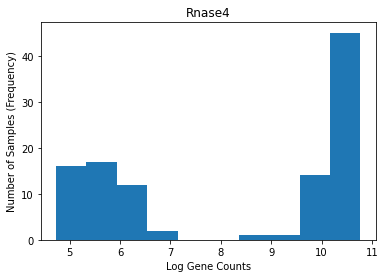

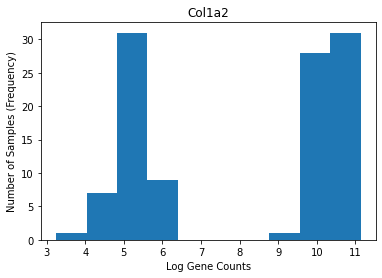

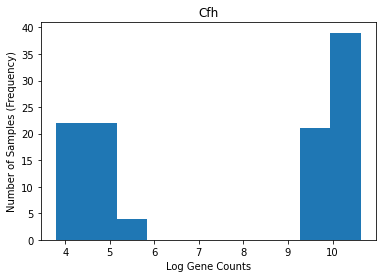

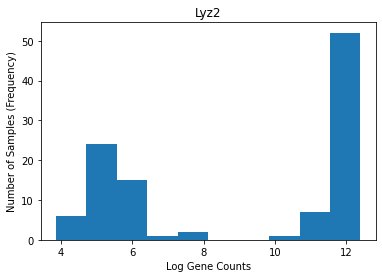

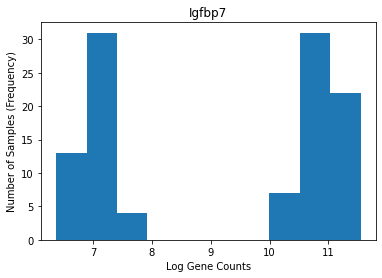

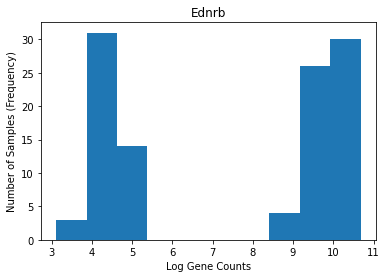

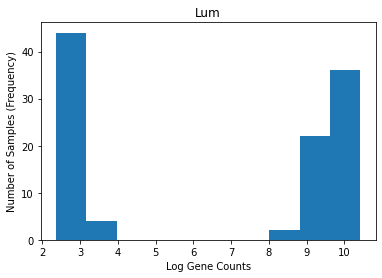

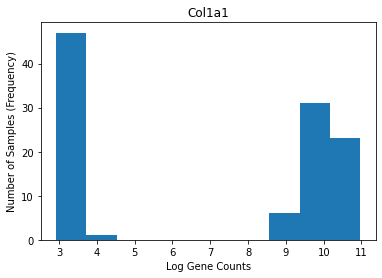

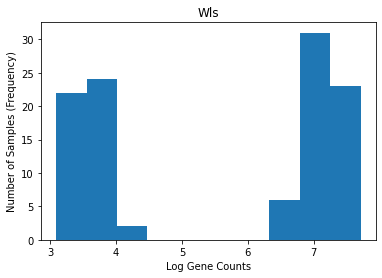

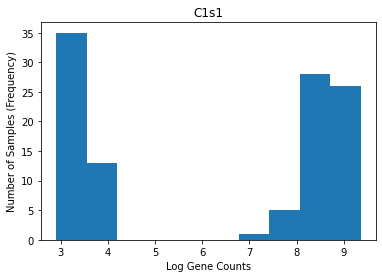

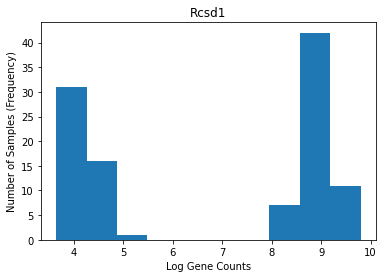

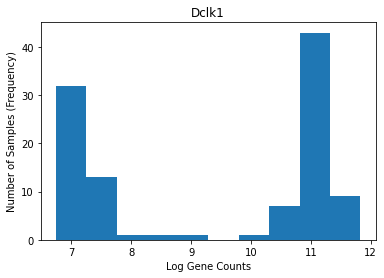

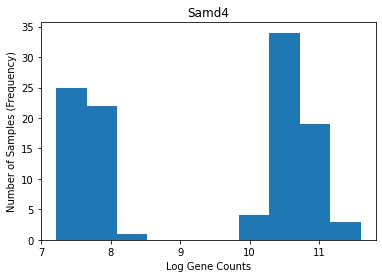

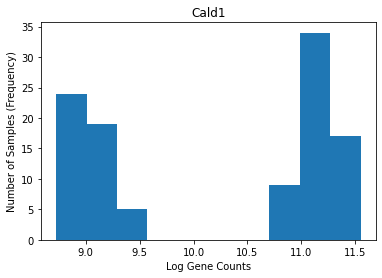

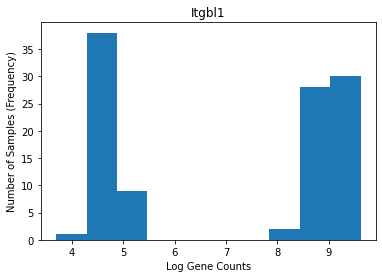

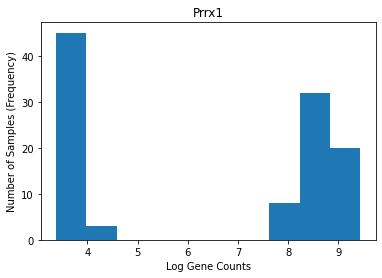

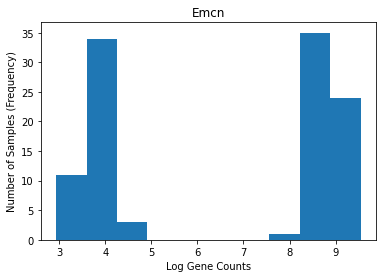

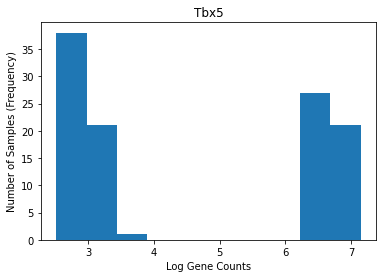

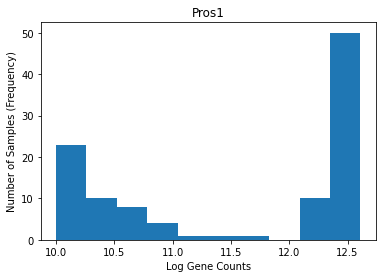

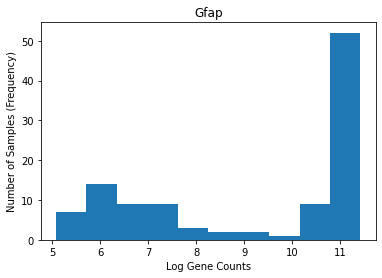

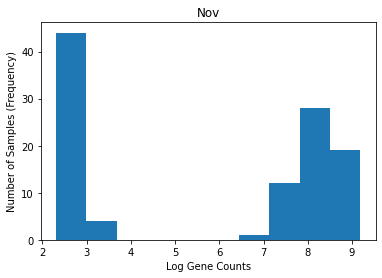

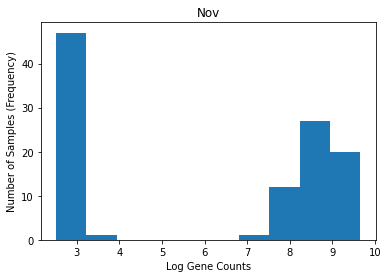

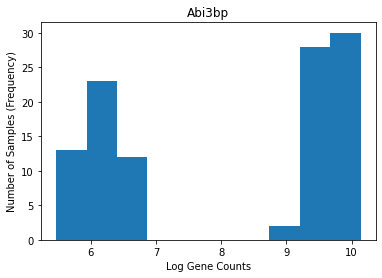

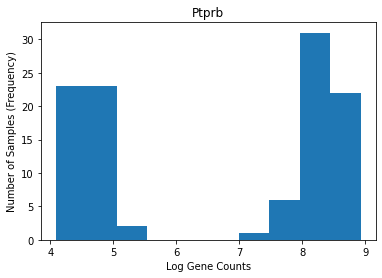

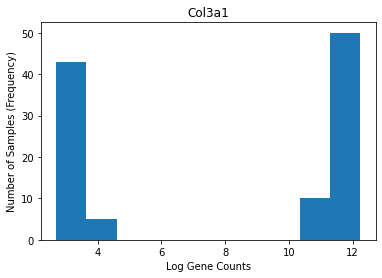

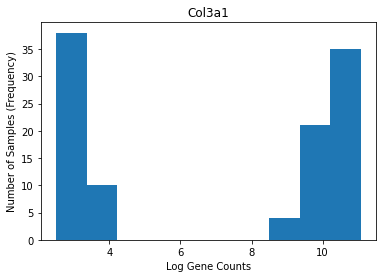

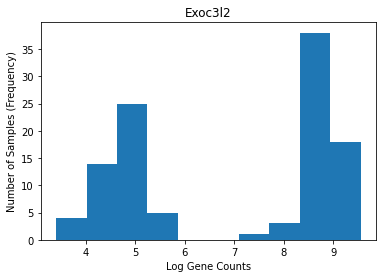

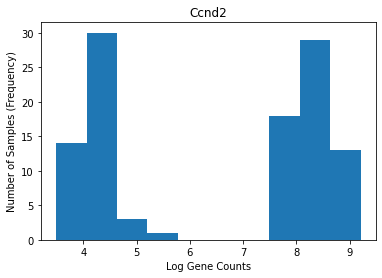

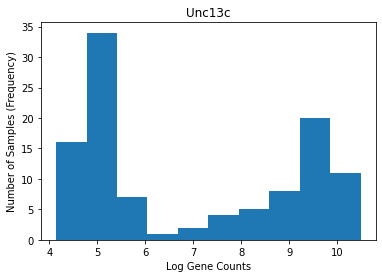

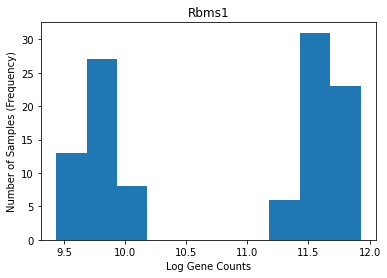

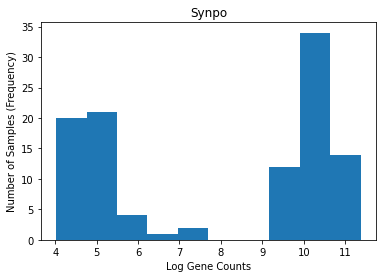

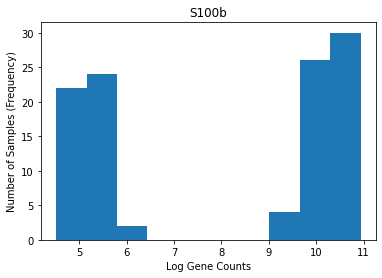

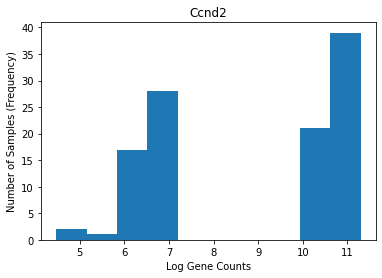

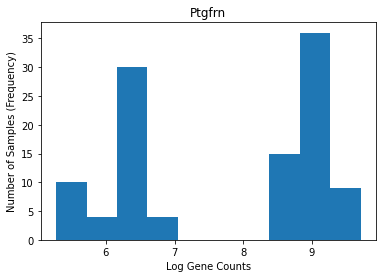

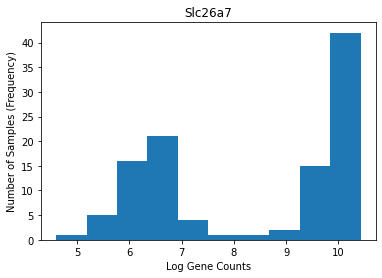

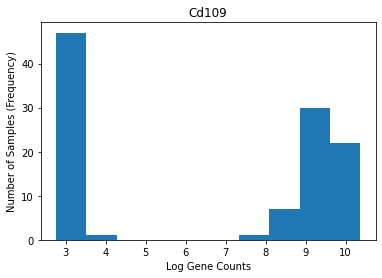

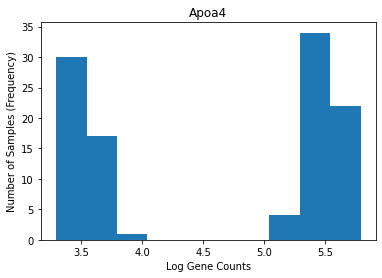

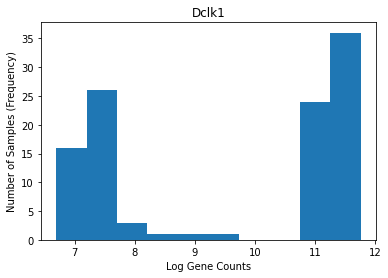

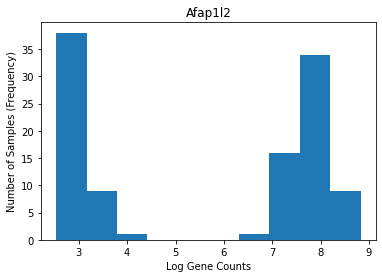

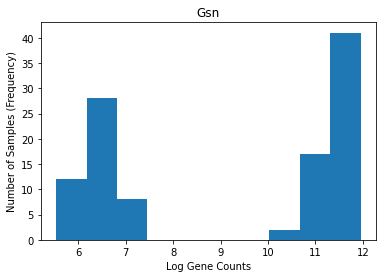

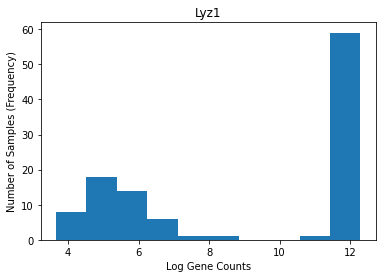

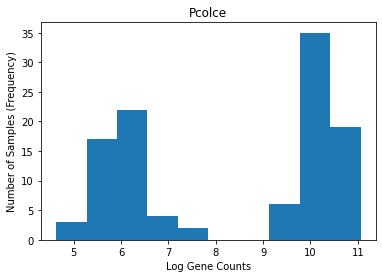

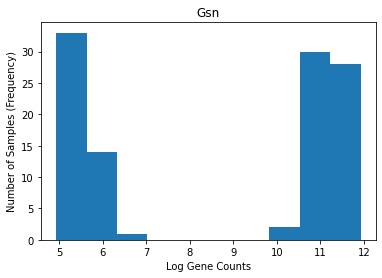

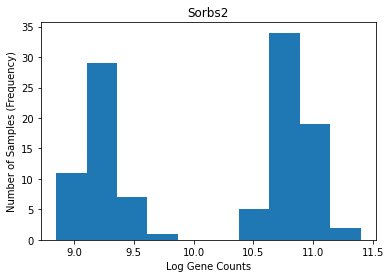

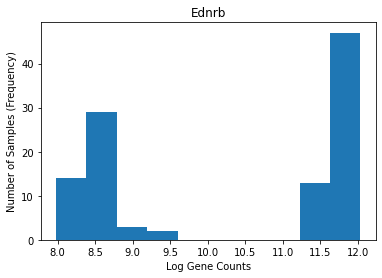

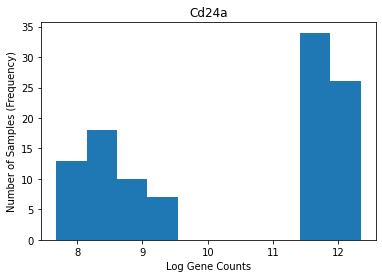

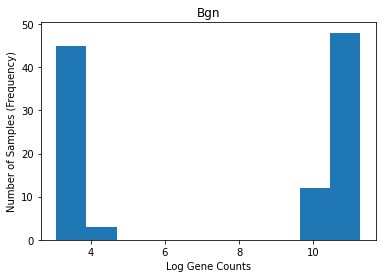

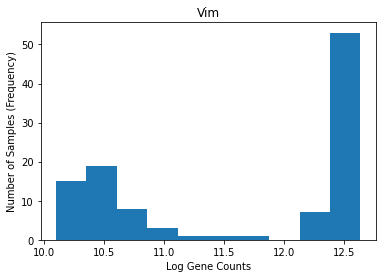

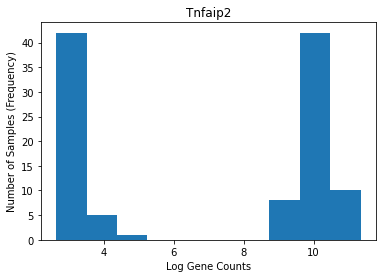

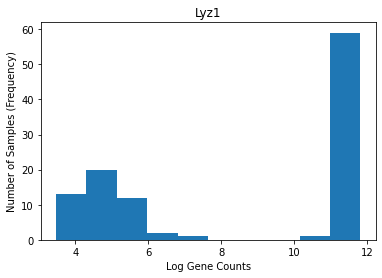

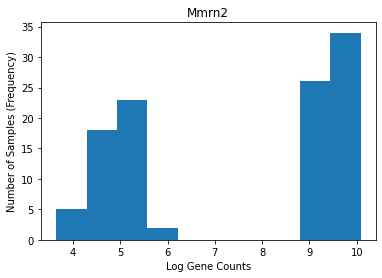

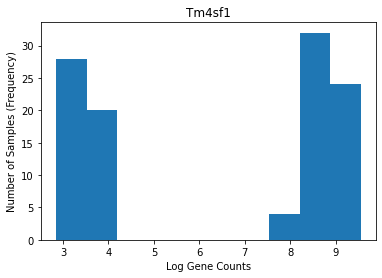

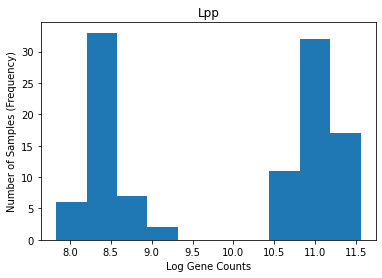

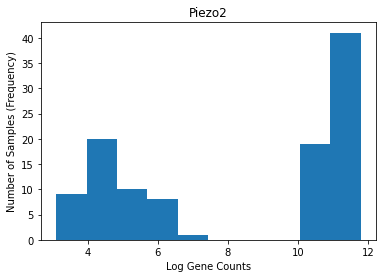

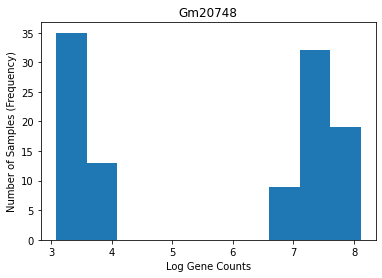

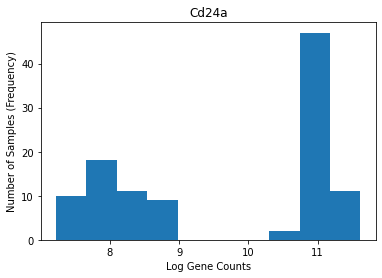

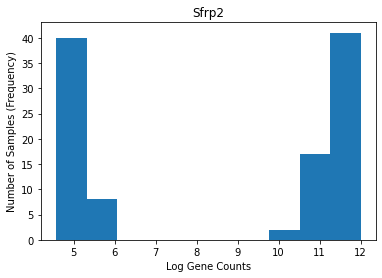

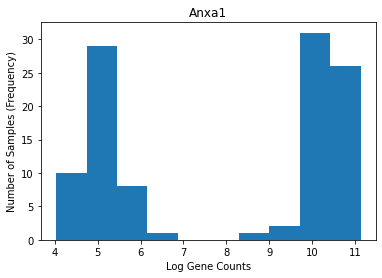

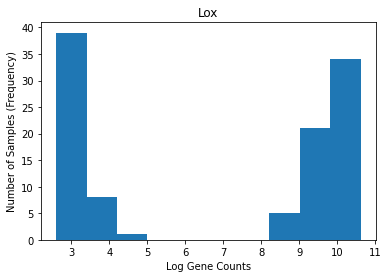

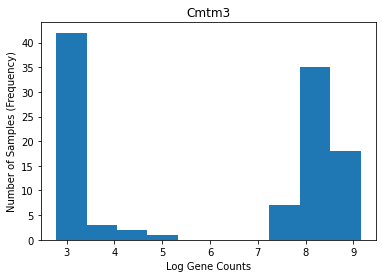

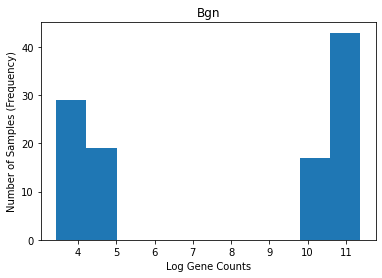

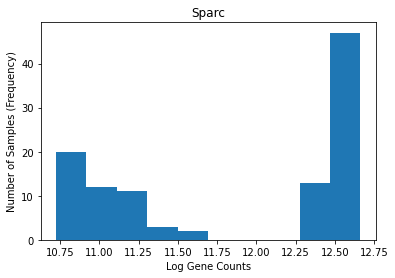

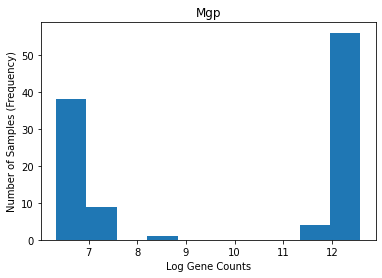

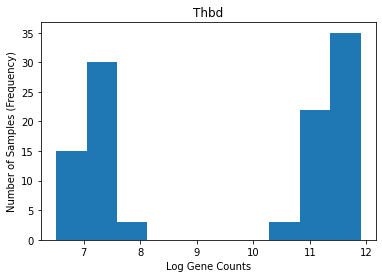

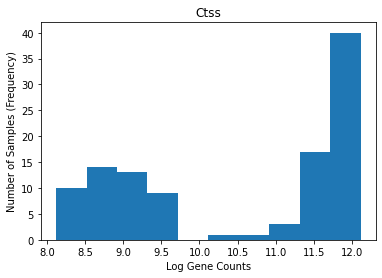

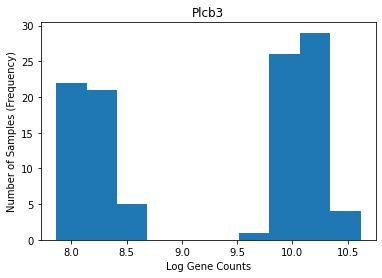

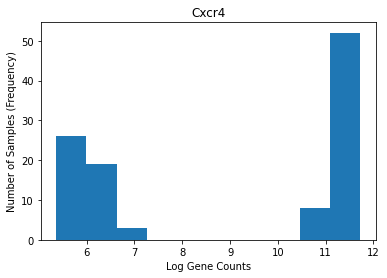

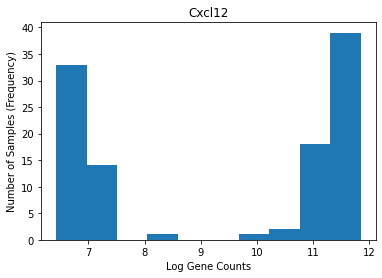

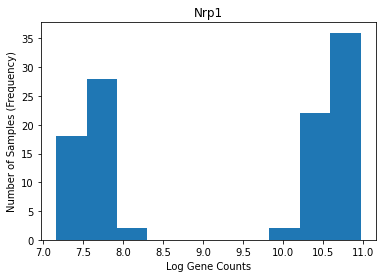

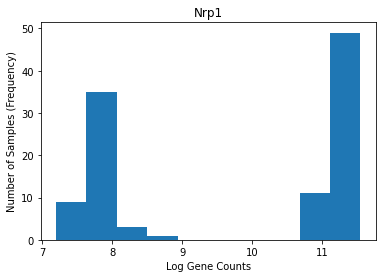

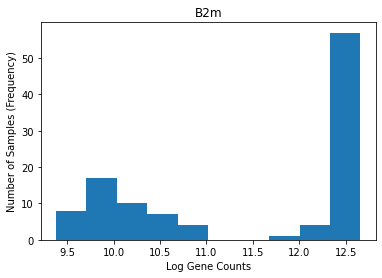

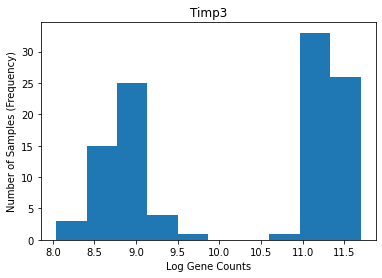

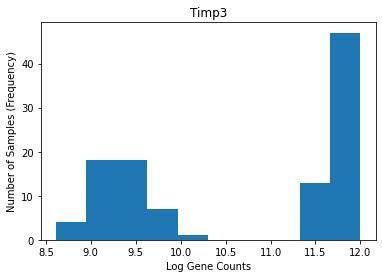

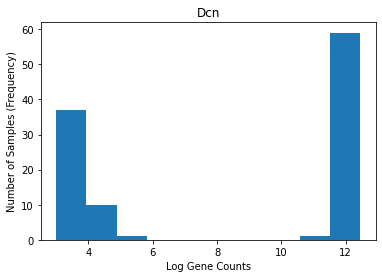

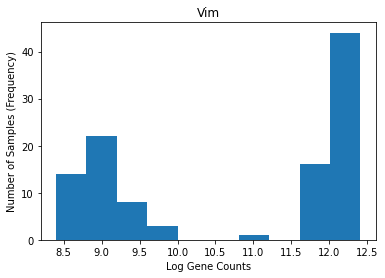

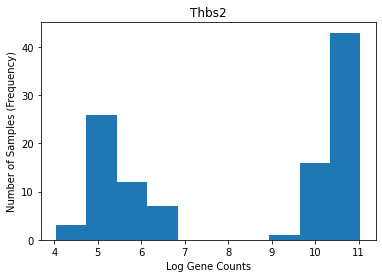

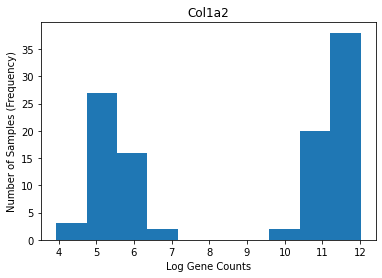

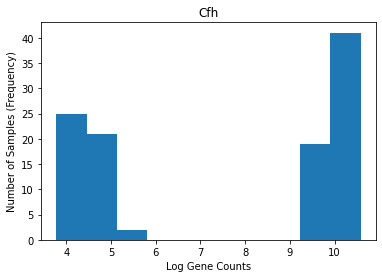

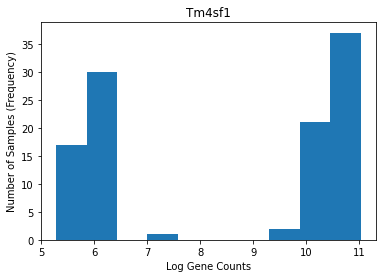

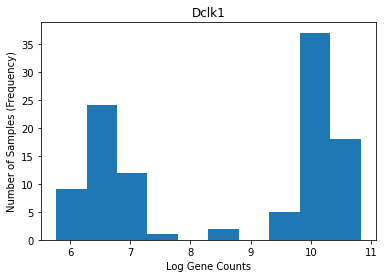

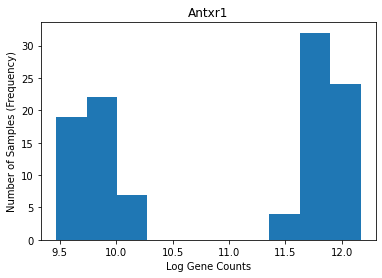

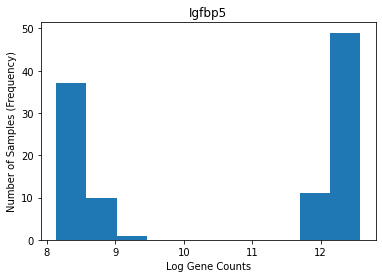

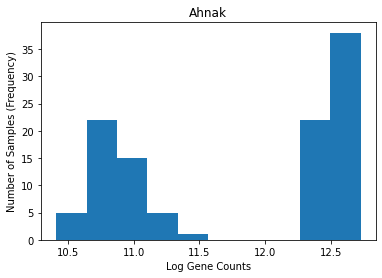

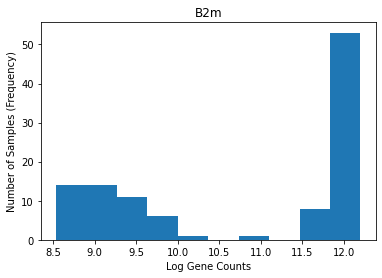

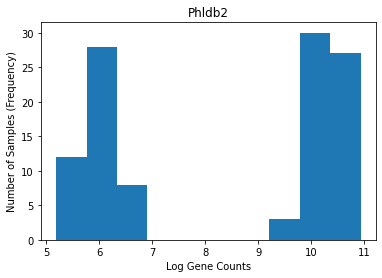

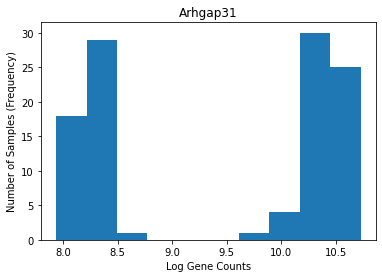

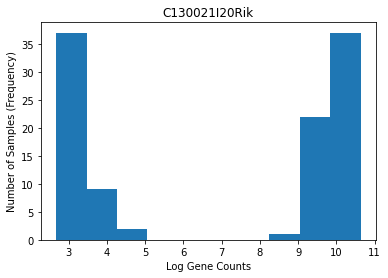

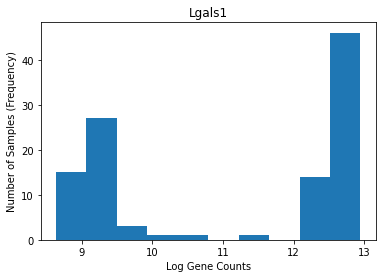

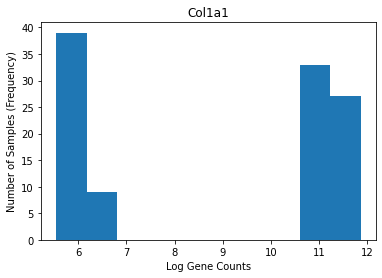

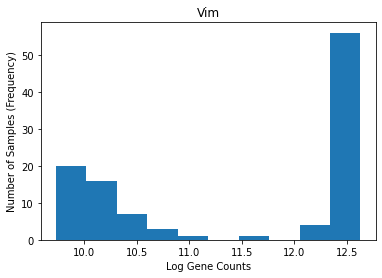

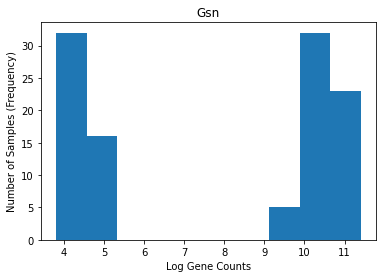

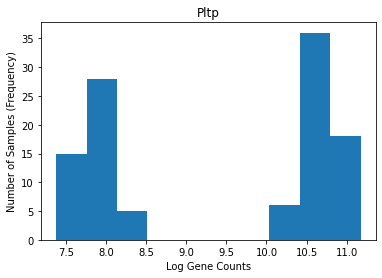

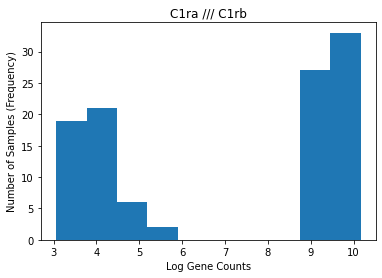

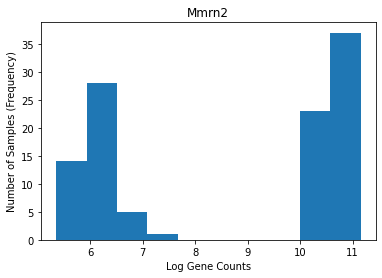

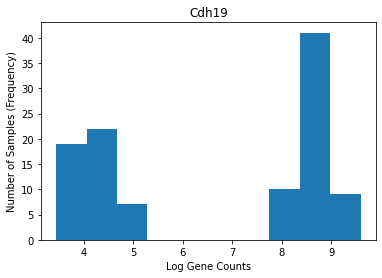

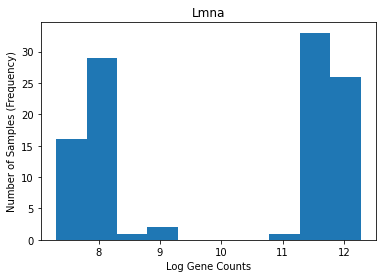

In [ ]:
if not(os.path.isdir("skewed_genes")):
  os.mkdir("skewed_genes")
else:
  ! rm -rf skewed_genes
  os.mkdir("skewed_genes")

for i in range(len(skewed_genes)):
  _ = plt.hist(df.iloc[list(genes_metadata.index).index(skewed_genes.index[i]),:], bins=10)
  plt.title(str(genes_metadata["Gene Symbol"][skewed_genes.index[i]]))
  plt.xlabel("Log Gene Counts")
  plt.ylabel("Number of Samples (Frequency)")
  # plt.show()
  plt.savefig("skewed_genes" + "/" + genes_metadata["Gene Symbol"][skewed_genes.index[i]].replace("/", "_"))
  plt.show()

In [ ]:
!zip -r skewed_genes.zip skewed_genes
df.to_csv("data.csv")
genes_metadata.to_csv("genes_metadata.csv")
pd.DataFrame(le.inverse_transform(labels)).to_csv("labels.csv")
pd.DataFrame(le2.inverse_transform(types)).to_csv("types.csv")
pd.DataFrame(all_labels).to_csv("all_labels.csv")

updating: skewed_genes/ (stored 0%)
updating: skewed_genes/Smpdl3a.png (deflated 12%)
updating: skewed_genes/Tek.png (deflated 12%)
updating: skewed_genes/Cd24a.png (deflated 12%)
updating: skewed_genes/Pltp.png (deflated 10%)
updating: skewed_genes/C1ra ___ C1rb.png (deflated 11%)
updating: skewed_genes/Ahnak.png (deflated 11%)
updating: skewed_genes/Rgs5.png (deflated 11%)
updating: skewed_genes/Myl12a.png (deflated 10%)
updating: skewed_genes/S100a6.png (deflated 11%)
updating: skewed_genes/Islr.png (deflated 11%)
updating: skewed_genes/Dcn.png (deflated 12%)
updating: skewed_genes/Ptgfrn.png (deflated 11%)
updating: skewed_genes/Piezo2.png (deflated 11%)
updating: skewed_genes/Txnip.png (deflated 12%)
updating: skewed_genes/Pdzrn3.png (deflated 12%)
updating: skewed_genes/S100b.png (deflated 12%)
updating: skewed_genes/Serping1.png (deflated 10%)
updating: skewed_genes/Lum.png (deflated 13%)
updating: skewed_genes/Ednrb.png (deflated 12%)
updating: skewed_genes/Abi3bp.png (deflated